# Project 2

#### Kyle Tadokoro
#### 2024-02-27

## Introduction to Dataset and Relevance

This document will examine and interpret what conclusions can be made using the "larger_sales_dataset.csv" obtained from Hassane Skikri through kaggle.com.  For convenience sake, we will be referring to the business this dataset comes from as BusA Sales.  The set consists of 10000 observations of 10 variables.  Though the data in this set is fictional, it represents a realistic example of data that a business may collect during standard operation.  Being able to clean, sort, and make sense of such a dataset is a skill that would be beneficial for the vast majority of businesses to employ.  

In [112]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Import the File

In [113]:
df = pd.read_csv('larger_sales_dataset.csv')
df_sort_date = df.sort_values(by = 'Order Date')

### Summary of BusA Sales Data

In [114]:
df.describe(include = 'all')

,Order ID,Product ID,Product Category,Quantity,Unit Price,Total Price,Order Date,Customer ID,Payment Type,Order Status
count,10000,10000,10000,10000.000000,10000.000000,10000.000000,10000,10000,10000,10000
unique,10000,10000,6,NaN,NaN,NaN,365,10000,4,4
top,921fafe7-640c-42aa-9609-21269106a202,beb24319-053d-4096-b225-867214413960,Sports & Outdoors,NaN,NaN,NaN,2023-12-16,93ad1fe6-1e11-4b55-9d89-c937cec041e5,PayPal,Pending
freq,1,1,1719,NaN,NaN,NaN,47,1,2573,2575
mean,NaN,NaN,NaN,3.009700,253.278078,762.724197,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,1.399286,142.523046,593.515659,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,1.000000,10.071462,10.092483,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,2.000000,129.205590,284.388946,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,3.000000,251.669090,602.823424,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,4.000000,378.259451,1129.878504,NaN,NaN,NaN,NaN


In [115]:
# Number of Unique Customers
print("Number of Unique Customers: " + str(df["Customer ID"].nunique()))

Number of Unique Customers: 10000


In [116]:
# Range of Dates
print("The range of dates: " + min(df["Order Date"]) + " to "  + max(df["Order Date"]))

The range of dates: 2023-01-01 to 2023-12-31


## Questions to answer about this set

- In which category is the most money being made?
- What time of year are sales peaking for each category?
- What is the average total for orders?
- What percentage of sales are refunded or cancelled?


### Where is the money being made?

BusA Sales sells items from 6 categories
- Sports & Outdoors
- Home & Kitchen
- Beauty & Health
- Books
- Electronics
- Clothing

### Sales by Category

In the list below, we can see the distribution of sales made by each of the categories.  The highest performing category was Sports & Outdoors bringing in over 1.31 million in sales.  This is in comparison to the lowest performing category of Beauty & Health with a perfomance of 1.2 million.  

In [117]:
cats = ["Sports & Outdoors", "Clothing", "Electronics", "Home & Kitchen", "Books", "Beauty & Health"]
totalpDict = {}
counter = 0
for i in cats:
    tempLine = {i: "${:,.2f}".format(round(sum(df["Total Price"][df["Product Category"] == i]), 2))}
    totalpDict[counter] = tempLine
    counter = counter + 1
totalpDict

{0: {'Sports & Outdoors': '$1,313,735.43'},
 1: {'Clothing': '$1,303,679.19'},
 2: {'Electronics': '$1,290,283.08'},
 3: {'Home & Kitchen': '$1,268,471.95'},
 4: {'Books': '$1,249,307.25'},
 5: {'Beauty & Health': '$1,201,765.08'}}

### Number of Transactions by Category

Next, the number of transactions tells us the amount of customers that bought from each category.  This is in contrast to the amount they are spending.  We can see by plotting a histogram that the 6 categories are remarkably similar to one another.  

Text(0.5, 1.0, 'Histogram of Transactions')

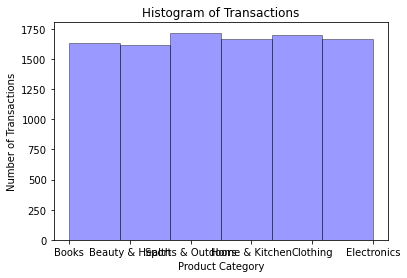

In [118]:
fig = plt.figure()
ax1 = fig.add_subplot(1,1,1)
ax1.hist(df_sort_date['Product Category'], 
         bins = 6, 
         color = 'b',
         alpha = .4,
         edgecolor = 'black')
plt.xlabel('Product Category')
plt.ylabel('Number of Transactions')
plt.title('Histogram of Transactions')

### Biggest and Smallest Orders

e are also able to see that the top 10 Biggest orders of the 2023 year averaged at Total Price of $2491.64. It is also worth noting that in this top ten, we see the category of Books 3 times, Beauty & Health and Electronics 2 times, and Home & Kitchen, Sports & Outdoors, and Clothing only once.  

In [119]:
df_sort_price = pd.DataFrame(df, columns=['Total Price', 'Product Category', 'Order Date']).sort_values(by = 'Total Price')
print("10 Smallest Orders: \n ")
print(df_sort_price.head(10))
print("\n\n10 Largest Orders: \n")
print(df_sort_price.tail(10))

10 Smallest Orders: 
 
      Total Price   Product Category  Order Date
3276    10.092483           Clothing  2023-01-20
3159    10.598639     Home & Kitchen  2023-02-15
1921    10.802425     Home & Kitchen  2023-09-19
8529    11.058527  Sports & Outdoors  2023-06-10
6011    11.112996  Sports & Outdoors  2023-11-08
5262    11.271074    Beauty & Health  2023-02-01
3914    12.111023  Sports & Outdoors  2023-01-17
699     12.156129  Sports & Outdoors  2023-01-23
4324    12.186533     Home & Kitchen  2023-11-03
8114    13.001030     Home & Kitchen  2023-02-10


10 Largest Orders: 

      Total Price   Product Category  Order Date
9731  2485.285955              Books  2023-07-22
5711  2485.948678           Clothing  2023-12-08
5152  2487.235676        Electronics  2023-05-30
1781  2488.128718              Books  2023-09-08
1280  2490.066090  Sports & Outdoors  2023-01-27
6786  2492.414897    Beauty & Health  2023-10-23
154   2494.449821        Electronics  2023-09-14
4094  2494.532854      

### What Time of the Year are Sales Best?

When breaking down the distribution of sales throughout the year, it immediately becomes clear that the data in this file is fictional.  With a normal set of data with variables such as ours, it is typical to expect patterns and trends to appear at different times of the year that correlate with seasons, holidays, and other factors.  However, when plotting the total price of each observation against the order date, we can see an extraordinarily consistent layout develop through the 10,000 cases. 

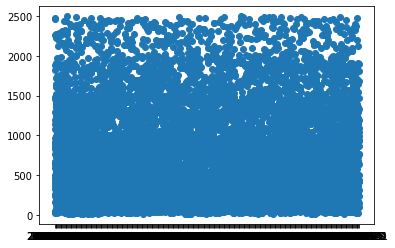

In [120]:
plt.scatter(df_sort_date['Order Date'], 
            df_sort_date['Total Price'])

### Order Totals Averaged by Month

In order to summarize the plot above in a way that is easier understood, I took the average total for orders for each month and plotted them.  Doing so, we are able to see that there is a slight deviation in order totals with the smallest amount made per order during the middle of the year before recovering back into the later months.  When looking at the graph, it is important that we keep the y-axis in mind.  Though the difference in average order totals seems dramatic, looking at the same plot with the bottom limit of our y-axis dropped to 0, we can see that the difference between the months is quite insignificant.  

In [121]:
#Create Vector of Sorted Order Dates as int(Month)

monthLi = []
priceLi = []

for i in df_sort_date['Order Date']:
    temp = str(i)[5:7]
    monthLi.append(temp)
for i in df_sort_date['Total Price']:
    priceLi.append(i)
    
df_money = pd.DataFrame({'Month': monthLi, 'Price': priceLi})


#set up scatter plot 2 lists
month = ['01', '02', '03', '04', '05', '06', '07', '08', '09', '10', '11', '12']
monAvgs = []
count = 0

for j in month:
    tempSum = 0
    length = 0
    for i in df_money['Month']:
        if (i == j):
            tempSum = tempSum + df_money['Price'][count]
            length = length + 1
            count = count + 1
    monAvgs.append(tempSum / length)

Text(0.5, 1.0, 'Average Order Total by Month')

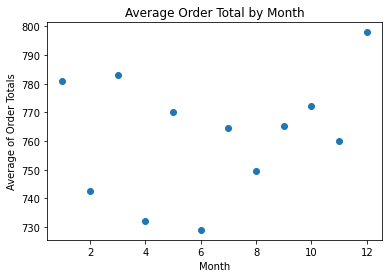

In [122]:
fig = plt.figure()
ax1 = fig.add_subplot(1,1,1)
ax1.scatter(range(1,13), monAvgs)
plt.xlabel('Month')
plt.ylabel('Average of Order Totals')
plt.title('Average Order Total by Month')

Text(0.5, 1.0, 'Average Order Total by Month')

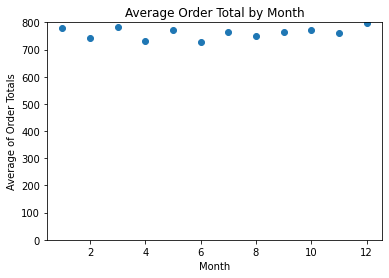

In [123]:
fig = plt.figure()
ax1 = fig.add_subplot(1,1,1)
ax1.scatter(range(1,13), monAvgs)
plt.ylim(0,800)
plt.xlabel('Month')
plt.ylabel('Average of Order Totals')
plt.title('Average Order Total by Month')

### Order Status Distribution

An important subject to talk about is the ratio of orders that are either refunded or cancelled.  With a combined 49% between the two categories, the amount of orders that are netting a negative return are hard to imagine.  This combined with the fact that with a pending order rate of nearly 25% as well, one could expect nearly 2/3 of orders to not be successful.  

Text(0.5, 1.0, 'Histogram of Order Status')

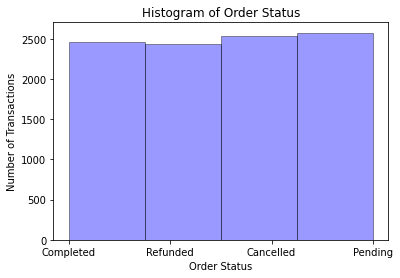

In [124]:
fig = plt.figure()
ax1 = fig.add_subplot(1,1,1)
ax1.hist(df_sort_date['Order Status'],  
         bins = 4,
         color = 'b',
         alpha = .4,
         edgecolor = 'black')
plt.xlabel('Order Status')
plt.ylabel('Number of Transactions')
plt.title('Histogram of Order Status')

### Form of Payment Distribution

Finally, below we have the distribution of payment types that customers used during the 2023 fiscal year.  Similar to the Order Status plot, we observe a similar amount of transactions between all 4 payment types with the most frequent being Paypal.  

Text(0.5, 1.0, 'Histogram of Payment Type')

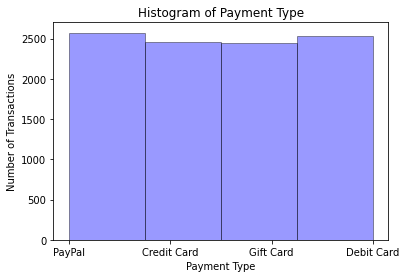

In [125]:
fig = plt.figure()
ax1 = fig.add_subplot(1,1,1)
ax1.hist(df_sort_date['Payment Type'],  
         color = 'b',
         bins = 4,
         alpha = .4,
         edgecolor = 'black')
plt.xlabel('Payment Type')
plt.ylabel('Number of Transactions')
plt.title('Histogram of Payment Type')

## Conclusion

In conclusion, the "larger_sales_dataset" by Hassane Skikri produced some interesting results upon data cleaning and wrangling.  We were able to determine that during the fiscal year of 2023, BusA Sales had a total of 10,000 customers.  These customers ordered the most from the categories of Sports & Outdoors and Clothing and the least from Beauty & Health.  They had the highest order totals in the months of October and November, used Paypal the most, and had an almost 50% rate of either returning or cancelling an order.  


While the fields that we observed were realistic, the data seen in this file is highly unlikely to come about during an actual business' operations.  In reality, it is likely that you would expect a higher variance in customer preferences (both categorical and chronological), distribution of sales, and a (hopefully) lower margin of refunded/cancelled orders.  In addition to what we were given in the set, another field that could prove useful towards BusA's endeavors could be a customer satisfaction survey of some sort.  
